In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# csp class
class CSP:
    def __init__(self , n , board):
        self.n = n
        self.board = board

    # Print table 
    def PrintTable(self):
        table = np.array(self.board)
        _ , im = plt.subplots()
        im.matshow(table, cmap='binary')

        for i in range(len(table)):
            for j in range(len(table[i])):
                if (i + j) % 2 == 0:
                    SquareColor = 'white'  
                else:
                    SquareColor = 'black'
                im.add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, color=SquareColor))
                if table[i, j] == 1:
                    plt.text(j, i, '♕', ha='center', va='center', color='r', fontsize=20)

        plt.show()

    def Constraint(self, row, col):
        # Ministers should not be in the same row
        for i in range(col):
            if self.board[row][i] == 1:
                return False 
            
        # Check the diameter (toward the top left)    
        r = row ; c = col
        while r >= 0 and c >= 0:
            if self.board[r][c] == 1:
                return False
            r -= 1
            c -= 1
        # Check the diameter (toward the bottom left)    
        r = row ; c = col
        while r < self.n and c >= 0:
            if self.board[r][c] == 1:
                return False
            r += 1
            c -= 1

        return True

In [9]:
def SelectUnassignedVariable(assignment , csp):
    for i in range(csp.n):
        if assignment[i] == 'unassigned':
            return i

In [10]:
def OrderDomainValue(csp):
    return list(range(csp.n)) 

In [11]:
# Backbacktracking search 
def BT(csp, assignment):
    if assignment.count('assigned') == csp.n: # Reaching the last column and returning true
        return csp
    var = SelectUnassignedVariable(assignment , csp)

    for i in OrderDomainValue(csp):
        if csp.Constraint(i , var): #If the table was safe
            csp.board[i][var] = 1
            assignment[var] = 'assigned'
            if BT(csp , assignment):
                return True
            csp.board[i][var] = 0
            
    assignment[var] = 'unassigned'
    return False # to backbacktrack 

Solution found!


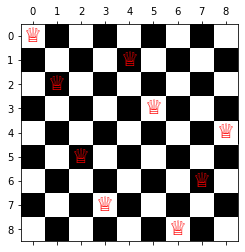

In [12]:
n = 9 #int(input())
table = [[0 for _ in range(n)] for _ in range(n)]
sample = CSP(n , table)
assignment = ['unassigned' for _ in range(n)]

if not BT(sample , assignment):
    print("Solution does not exist")
else:
    print("Solution found!")
    sample.PrintTable()